In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read Dataset
dataset = pd.read_csv('Mall-Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, [3, 4]].values

In [5]:
# Initialize and fit HDBSCAN
from sklearn.cluster import HDBSCAN
clusterer = HDBSCAN(min_cluster_size=10, min_samples=2,cluster_selection_method='eom', metric='euclidean')  
cluster_labels = clusterer.fit_predict(X)


In [6]:
# Print cluster information
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 6
Number of noise points: 19


In [7]:
supervised=pd.DataFrame(dataset)

In [8]:
supervised['Cluster_group']=cluster_labels

In [9]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,5
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


/opt/anaconda3/envs/AIML/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


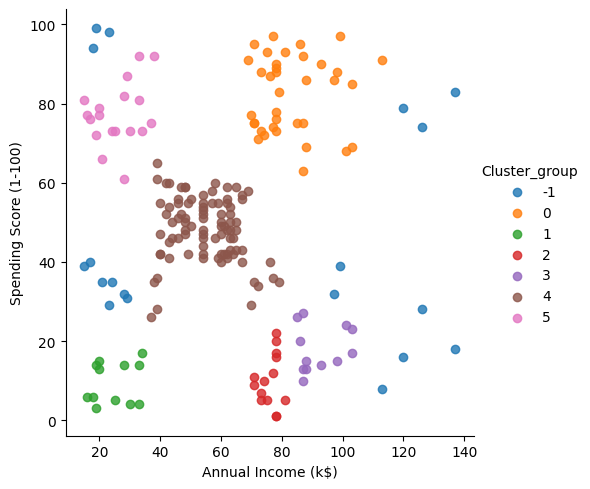

In [10]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)